# DATA SCIENCE

# CUSTOMER SEGMENTATION USING KMEANS CLUSTERING 

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


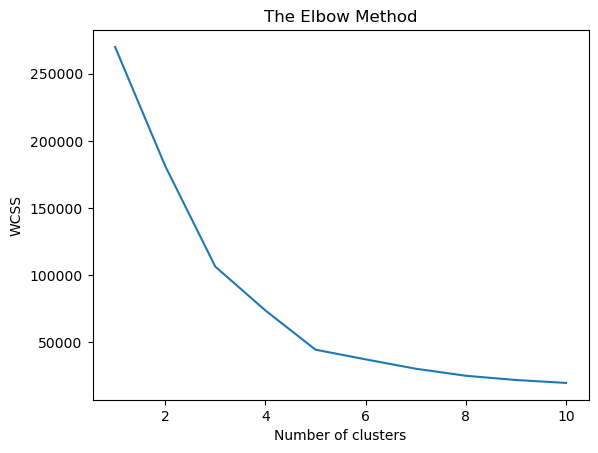

In [38]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# ANNUAL INCOME AND SPENDING SCORE CLUSTERING

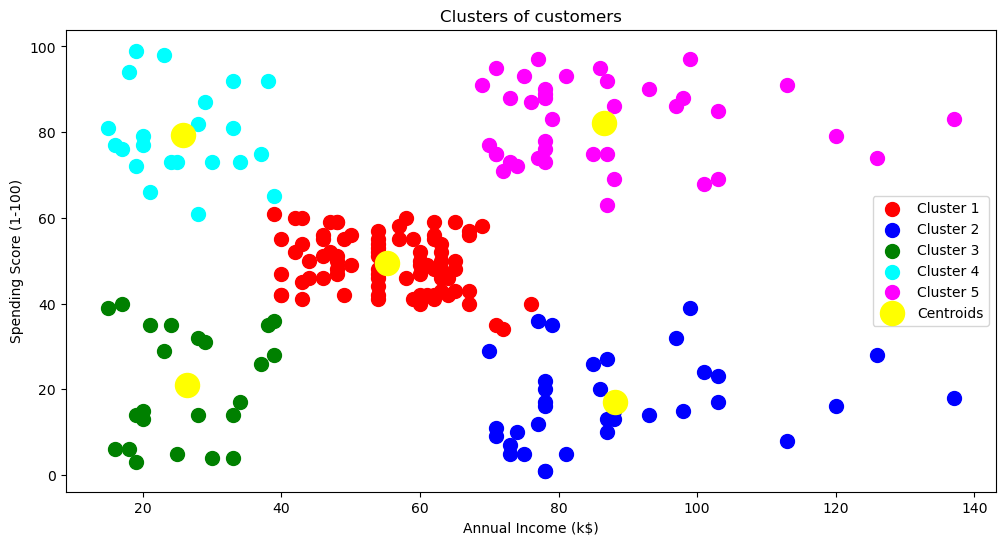

In [39]:

# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.figure(figsize=(12, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# GENDER VS AGE CLUSTERING

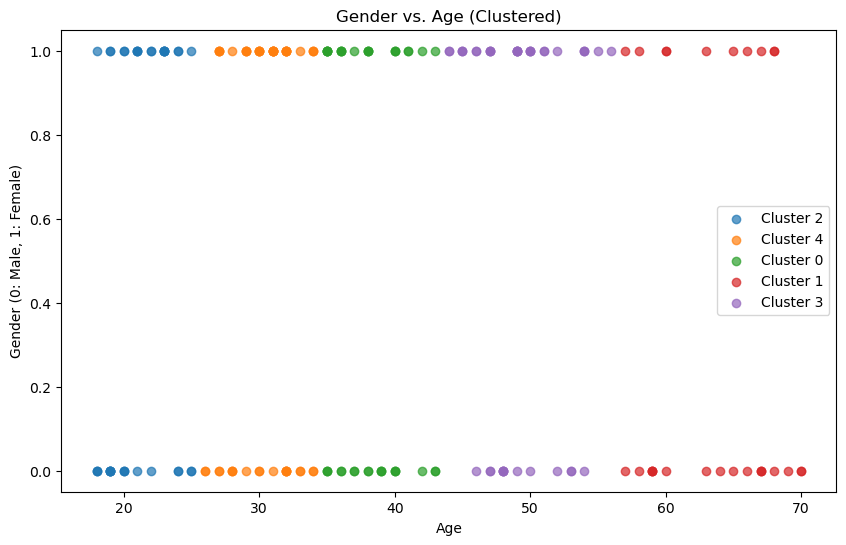

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the data
data = pd.read_csv('Mall_Customers.csv')

# Step 2: Data Preprocessing
# Drop irrelevant columns
data.drop('CustomerID', axis=1, inplace=True)

# Convert categorical data (Gender) to numerical
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Step 3: Apply K-means Clustering
# Choose the number of clusters based on domain knowledge or other techniques like the elbow method
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Gender', 'Age']])

# Step 4: Visualize the Gender and Age Distributions
plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Gender'], label=f'Cluster {cluster}', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Gender (0: Male, 1: Female)')
plt.title('Gender vs. Age (Clustered)')
plt.legend()
plt.show()


# CORRELATION MATRIX

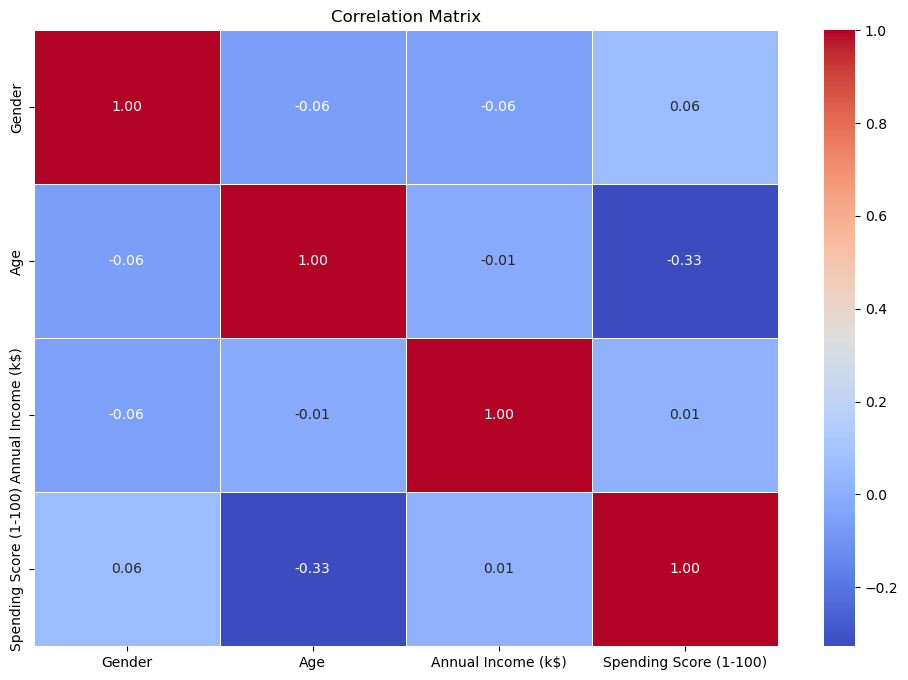

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Mall_Customers.csv')

# Step 2: Data Preprocessing
# Drop irrelevant columns
data.drop('CustomerID', axis=1, inplace=True)

# Convert categorical data (Gender) to numerical
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Step 3: Correlation Analysis
correlation_matrix = data.corr()

# Step 4: Visualize the Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



# VISUALISATION ANALYSIS

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Age', data=data)
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Age Distribution per Cluster')
plt.show()


ValueError: Could not interpret input 'Cluster'

<Figure size 1200x600 with 0 Axes>

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', hue='Gender', data=data)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Gender Distribution per Cluster')
plt.show()


ValueError: Could not interpret input 'Cluster'

<Figure size 800x500 with 0 Axes>

In [26]:
plt.figure(figsize=(12, 5))
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.hist(cluster_data['Age'], bins=20, alpha=0.5, label=f'Cluster {cluster}')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Cluster')
plt.legend()
plt.show()



KeyError: 'Cluster'

<Figure size 1200x500 with 0 Axes>

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Cluster', y='Age', data=data)
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Age Distribution per Cluster')
plt.show()



ValueError: Could not interpret input 'Cluster'

<Figure size 1000x600 with 0 Axes>

In [34]:
gender_distribution = data.groupby('Cluster')['Gender'].value_counts().unstack()
gender_distribution.plot(kind='pie', subplots=True, figsize=(12, 6), autopct='%1.1f%%', legend=False)
plt.suptitle('Gender Distribution across Clusters', y=1.02)
plt.show()


KeyError: 'Cluster'


# Distribution of ages differentiated by gender using stacked bars

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


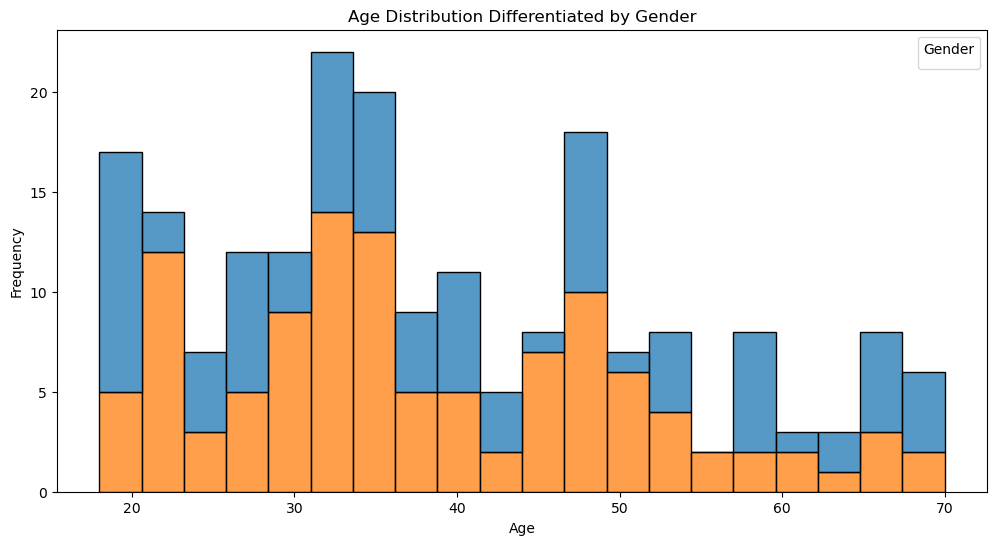

In [35]:

# Create a stacked histogram for age distribution differentiated by gender
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Age', hue='Gender', multiple='stack', bins=20)
plt.title("Age Distribution Differentiated by Gender")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(title="Gender")
plt.show()


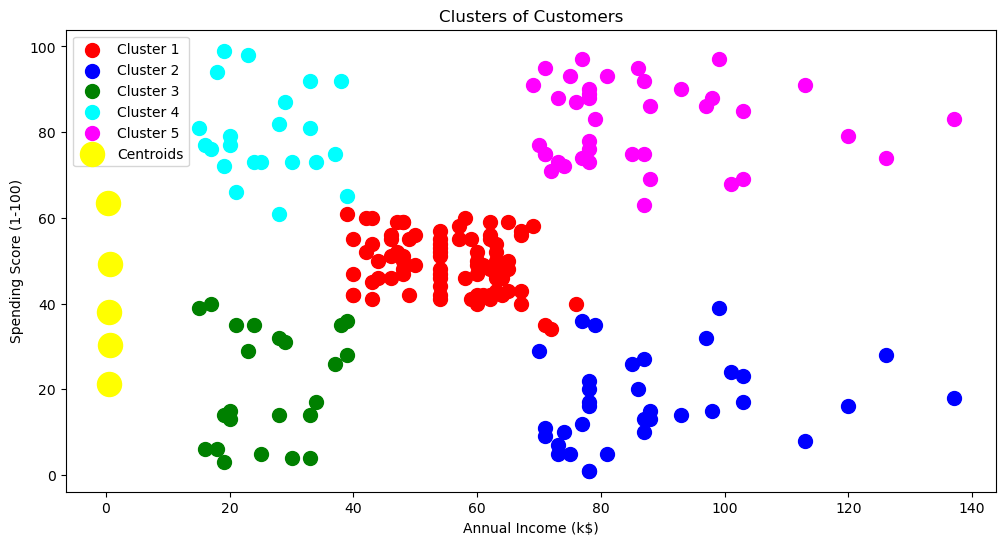

In [36]:

# Scatter plot for Annual Income vs Spending Score
plt.figure(figsize=(12, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv("Mall_Customers.csv")

# Select features for clustering
X = data.iloc[:, [3, 4]].values

# K-means clustering
num_clusters = 5  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Scatter plot for Annual Income vs Spending Score
plt.figure(figsize=(12, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow


SyntaxError: EOL while scanning string literal (3004959756.py, line 24)